In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# <b> K-means clustering demonstration </b>


Clustering helps identify two qualities of data:

+ Meaningfulness
+ Usefulness

## <b> Revisiting k-means algorithm

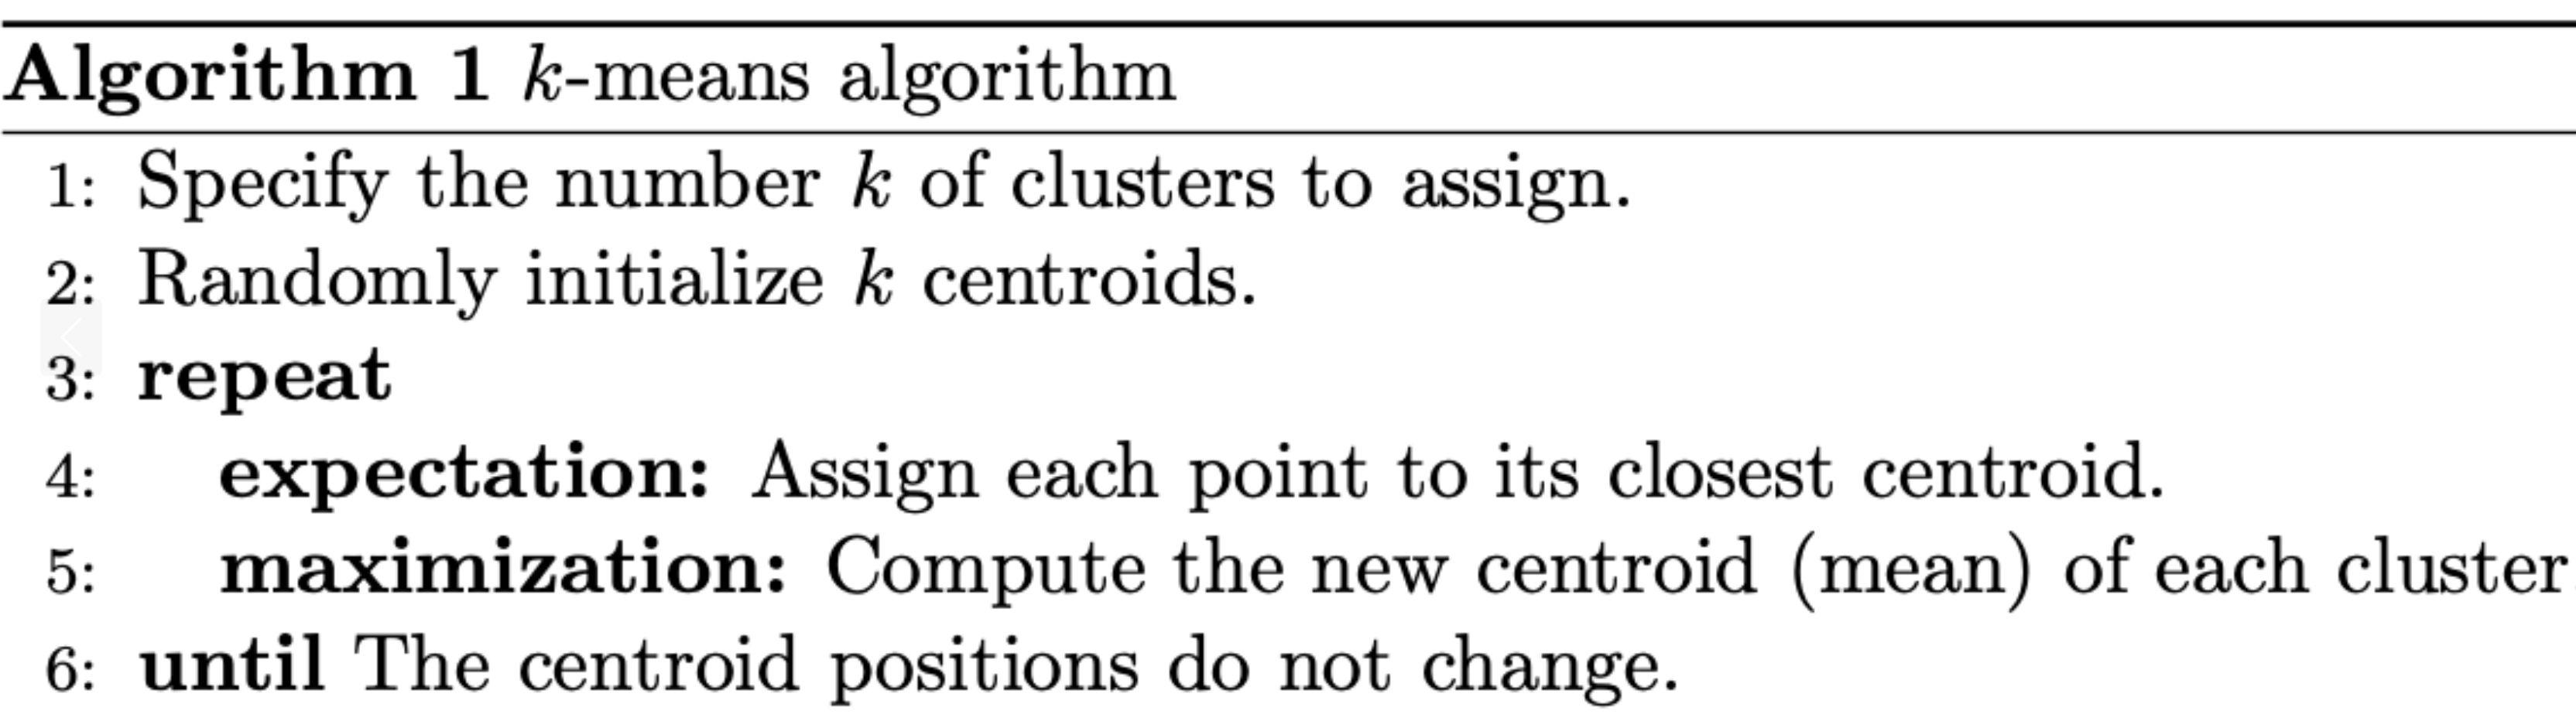

- Talked in 13-15 slides

# Writing Your First K-Means Clustering Code in Python

+ There is a nice implementation of k-means clustering in Python from the popular machine learning package [scikit-learn](https://scikit-learn.org/stable/).

In [3]:
features, true_labels = make_blobs(
    n_samples=200,
    centers=3, 
    cluster_std=2.75,
    random_state=42
)

In [4]:
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [5]:
true_labels[:5]

array([1, 0, 2, 2, 2])

In [6]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [7]:
scaled_features[:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

In [8]:
kmeans = KMeans(
    init='random',
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [9]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

In [10]:
# The lowest SSE value
kmeans.inertia_

74.57960106819854

In [11]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[ 1.19539276,  0.13158148],
       [-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732]])

In [12]:
# The number of iterations required to converge
kmeans.n_iter_

6

# <b> Choosing the Appropriate Number of Clusters


+ The elbow method
+ The silhouette coefficient

In [13]:
kmeans_kwargs = {
    'init': 'random',
    'n_init': 10,
    'max_iter': 300,
    'random_state': 42
    }

# A list holds the SSE (sum of squared error) values for each k
sse =[]
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

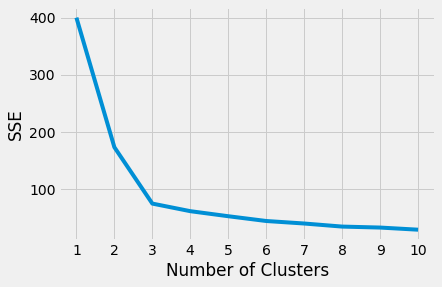

In [14]:
plt.style.use('fivethirtyeight')
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show;

In [15]:
kl = KneeLocator(
    range(1, 11), sse, curve='convex', direction='decreasing'
)

In [16]:
kl.elbow

3

In [17]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Start at 2 clusters for silhouette coeficient:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

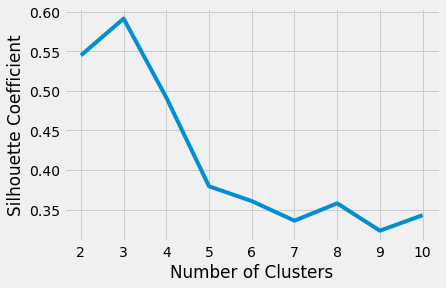

In [18]:
plt.style.use('fivethirtyeight')
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show;

# <b> Evaluating Clustering Performance Using Advanced Techniques

The elbow method and silhouette coefficient evaluate clustering performance without ground truth labels. Ground truth labels categorize data points into groups based on assignment by a human or an existing algorithm. These types of metrics do their best to suggest the correct number of clusters but can be deceiving when used without context.

## Ground truth metrics

In [19]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

In [20]:
features, true_labels = make_moons(
    n_samples=250,
    noise=0.05,
    random_state=42
)

In [21]:
scaled_features = scaler.fit_transform(features)

In [22]:
# Instantiate k-means and DBSCAN algorithms
kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=0.3)

# Fit the algorithm to the features
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

# Compute silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(scaled_features, kmeans.labels_).round(2)
dbscan_silhouette = silhouette_score(scaled_features, dbscan.labels_).round(2)

In [23]:
kmeans_silhouette

0.5

In [24]:
dbscan_silhouette

0.38

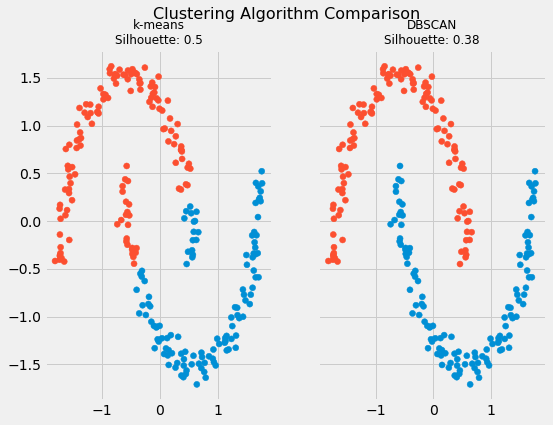

In [25]:
# Plot the data and cluster silhouette comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6), sharex=True, sharey=True)
fig.suptitle(f'Clustering Algorithm Comparison', fontsize=16)
fte_colors = {
    0: '#008fd5',
    1: '#fc4f30',
}

# The k-means plot
km_colors = [fte_colors[label] for label in kmeans.labels_]
ax1.scatter(scaled_features[:, 0], scaled_features[:, 1], c=km_colors)
ax1.set_title(
    f'k-means\nSilhouette: {kmeans_silhouette}', fontdict={'fontsize':12}
)

# The dbscan plot
db_colors = [fte_colors[label] for label in dbscan.labels_]
ax2.scatter(scaled_features[:, 0], scaled_features[:, 1], c=db_colors)
ax2.set_title(
    f'DBSCAN\nSilhouette: {dbscan_silhouette}', fontdict={'fontsize':12}
)
plt.show()

In [26]:
ari_kmeans = adjusted_rand_score(true_labels, kmeans.labels_)
ari_dbscan = adjusted_rand_score(true_labels, dbscan.labels_)

In [27]:
round(ari_kmeans, 2)

0.47

In [28]:
round(ari_dbscan, 2)

1.0

# <b> K-Means Clustering in Python -- Synthetic Data

## K-Means Clustering in Python

In [29]:
import tarfile 
import urllib 

from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [30]:
uci_tcga_url = (
    'https://archive.ics.uci.edu/ml/machine-learning-databases/00401/'
)
archive_name = 'TCGA-PANCAN-HiSeq-801x20531.tar.gz'

# build the url
full_download_url = urllib.parse.urljoin(uci_tcga_url, archive_name)

# download the file
r = urllib.request.urlretrieve(full_download_url, archive_name)

# extract the data from the archive
tar = tarfile.open(archive_name, 'r:gz')
tar.extractall()
tar.close()

In [31]:
datafile = 'TCGA-PANCAN-HiSeq-801x20531/data.csv'
labels_file = 'TCGA-PANCAN-HiSeq-801x20531/labels.csv'

data = np.genfromtxt(
    datafile, delimiter=',', usecols=range(1, 20532), skip_header=1
)

true_label_names = np.genfromtxt(
    labels_file, delimiter=',', usecols=(1,), skip_header=1, dtype=str
)

In [32]:
data[:5, :3]

array([[0.        , 2.01720929, 3.26552691],
       [0.        , 0.59273209, 1.58842082],
       [0.        , 3.51175898, 4.32719872],
       [0.        , 3.66361787, 4.50764878],
       [0.        , 2.65574107, 2.82154696]])

In [33]:
true_label_names[:5]

array(['PRAD', 'LUAD', 'PRAD', 'PRAD', 'BRCA'], dtype='<U4')

The data variable contains all the gene expression values from 20,531 genes, while true_label_names are the cancer types for each of the 881 samples containing abbreviations of cancer types:

BRCA: Breast invasive carcinoma <br>
COAD: Colon adenocarcinoma <br>
KIRC: Kidney renal clear cell carcinoma <br>
LUAD: Lung adenocarcinoma <br>
PRAD: Prostate adenocarcinoma <br>

In [34]:
label_encoder = LabelEncoder()

In [35]:
true_labels = label_encoder.fit_transform(true_label_names)

In [36]:
true_labels[:5]

array([4, 3, 4, 4, 0])

In [37]:
label_encoder.classes_

array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype='<U4')

In [38]:
n_clusters = len(label_encoder.classes_)
n_clusters

5

In [39]:
preprocessor = Pipeline(
    [
        ('scaler', MinMaxScaler()),
        ('pca', PCA(n_components=2, random_state=42)),
    ]
)     

In [40]:
clusterer = Pipeline(
    [
        (
            'kmeans',
            KMeans(
                n_clusters=n_clusters,
                init='k-means++',
                n_init=50,
                max_iter=500,
                random_state=42,
            ),
        ),
    ]
)

In [41]:
pipe = Pipeline([('preprocessor', preprocessor), ('clusterer', clusterer)])

In [42]:
pipe.fit(data)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=5, n_init=50,
                                         random_state=42))]))])

In [43]:
preprocessed_data = pipe['preprocessor'].transform(data)

In [44]:
predicted_labels = pipe['clusterer']['kmeans'].labels_

In [45]:
silhouette_score(preprocessed_data, predicted_labels)

0.5118775528450312

In [46]:
adjusted_rand_score(true_labels, predicted_labels)

0.722276752060253

In [47]:
pcadf = pd.DataFrame(
    pipe['preprocessor'].transform(data),
    columns=['component_1', 'component_2'],
)

pcadf['predicted_cluster'] = pipe['clusterer']['kmeans'].labels_
pcadf['true_label'] = label_encoder.inverse_transform(true_labels)

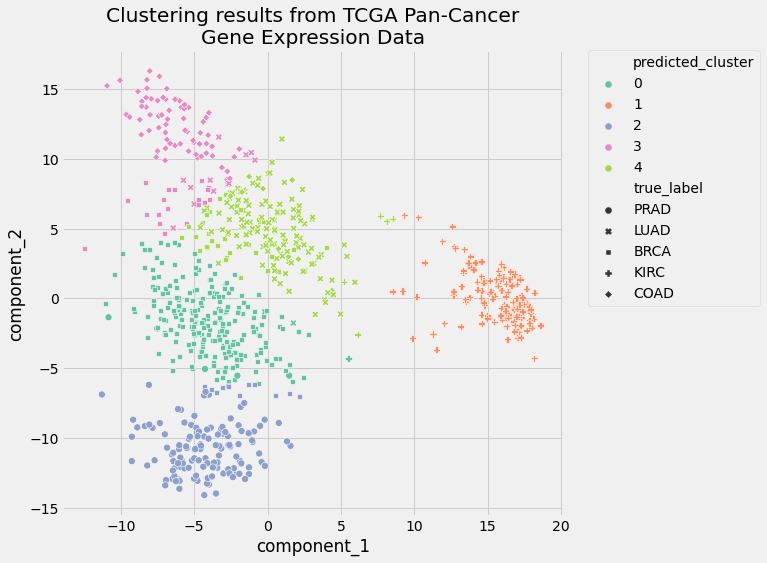

In [48]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8, 8))

scat = sns.scatterplot(
    'component_1', 
    'component_2',
    s=50,
    data=pcadf,
    hue='predicted_cluster',
    style='true_label',
    palette='Set2',
)

scat.set_title('Clustering results from TCGA Pan-Cancer\nGene Expression Data')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show;
    

## <b> Tuning a K-Means Clustering Pipeline

In [49]:
# Empty lists to hold evaluation metrics
silhouette_scores = []
ari_scores = []
for n in range(2, 11):
    pipe['preprocessor']['pca'].n_components = n
    pipe.fit(data)
    
    silhouette_coef = silhouette_score(
        pipe['preprocessor'].transform(data),
        pipe['clusterer']['kmeans'].labels_,
    )
    ari = adjusted_rand_score(
        true_labels,
        pipe['clusterer']['kmeans'].labels_,
    )
    
    silhouette_scores.append(silhouette_coef)
    ari_scores.append(ari)

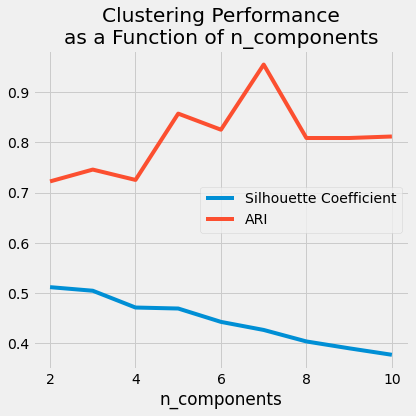

In [50]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(6, 6))
plt.plot(
    range(2, 11),
    silhouette_scores,
    c='#008fd5',
    label='Silhouette Coefficient',
)
plt.plot(range(2, 11), ari_scores, c='#fc4f30', label='ARI')

plt.xlabel('n_components')
plt.legend()
plt.title('Clustering Performance\nas a Function of n_components')
plt.tight_layout()
plt.show()

There are two takeaways from this figure:

+ The silhouette coefficient decreases linearly. The silhouette coefficient depends on the distance between points, so as the number of dimensions increases, the sparsity increases.

+ The ARI improves significantly as you add components. It appears to start tapering off after n_components=7, so that would be the value to use for presenting the best clustering results from this pipeline.

# <b> THE END OF MACHINE LEARNING UNSUPERVISED SESSION 2